![Logo](images/logo_mds.png)


# Simulación

La simulación es una de las técnicas analíticas más versátiles, consiste en la elaboración de un modelo probabilístico que imite, hasta cierto punto, las características de un sistema real de forma que las conclusiones obtenidas en el modelo puedan traslarse al sistema real que representa.

La simulación permite atacar problemas complejos de una forma sistemática y progresiva desde un conjunto de suposiciones iniciales bastante "inocentes" hasta un modelo completo que tenga en cuenta múltiples factores.

## ¿Qué es simular?

Podemos definir la simulación como:

> La experimentación, con una imitación **simplificada** en un ordenador de las operaciones llevadas a cabo en un **sistema**, según como progresa en el tiempo con el **propósito** de entender mejor cómo funciona y/o mejorarlo (Stewart Robinson - Simulation)

Con esta definición hay varias palabras clave de la definición que deben ser tratadas: **sistema**, **simplificación**, **propósito**.


### Sistema
Un **sistema** puede ser un sistema natural (clima, tiempo meteorológico, ...), un sistema físico (casa, coche,...), un sistema abstracto (modelo matemático) o un sistema humano (ciudad, manifestación...)

Por lo general, en los negocios, utilizaremos simulación para tratar una mezcla de sistemas cuyo objetivo sea predecir lo que pasará o prescribir qué debemos hacer para que pase lo que nosotros queremos/necesitamos.

### Simplificación
Otro aspecto importante de las simulaciones es la **simplificación**. Queremos que nuestro modelo sea lo más realista posible pero, para conseguir un sistema flexible y capaz de adaptarse a los cambios, también debemos reducir ciertos aspectos del mismo para que sea tratable.

Si tenemos una cafetería a pie de playa podemos estar interesados en el número de nuestros clientes según la marea, pero, en ningún caso deberíamos simular nosotros la altura que alcanzará la marea alta.

### Propósito
El último aspecto clave a tener en cuenta en un sistema simulado es el propósito para el que está siendo diseñado.

Podemos buscar diferentes objetivos:
* Tener un modelo para la prueba de escenarios "what-if"
* Buscar la mejor configuración (optimización heurística)

### Experimentación
Un modelo simulado debe permitir la experimentación, tal como se indicó anteriormente, son especialmente dados a la prueba de escenarios "y sí..." y esto debe ayudar al tomador de decisiones a comprobar diferentes alternativas y escoger aquella que mejor se alinee con los objetivos de negocio.

## Tipos de simulación

Diferenciamos varios tipos de simulación.

![tipos de simulacion](images/Tipos_simulacion.png)


### Simulación continua

La simulación continua utiliza métodos numéricos para evaluar cómo evoluciona el sistema, se aplica principalmente en sistemas físicos, por ejemplo para el calentamiento de tuberías, expansión de líquidos/gases,...

### Monte Carlo

El método de Monte-Carlo simula un proceso real mediante probabilidades, normalmente se utilizan varios procesos enlazados unos con otros en forma de cadena de Markov:

![Cadena markov](images/markovchaindg.png)

Cada proceso tiene una (o varias entradas) y una o varias salidas, cada una de ellas con una probabilidad de uso. 

Los procesos de análisis con cadena de Markov simulan la etnrada en el sistema de un conjunto de actores y evalúan cómo se mueven estos actores de un proceso a otro.

Permite encontrar cuellos de botella en el sistema o determinar si tenemos un equilibrio correcto entre nuestros componentes.

Un uso habitual del modelo de Monte Carlo aplicado a Cadenas de Markov (MCMC) es evaluar una red de carreteras, la capacidad de los flujos de una red de paquetería...

Una característica importante de los modelos de Monte Carlo es que las probabilidades de cambio son estáticas y no varían a pesar de que realicemos varias iteraciones.

### Eventos Discretos 

La simulación de eventos discretos utiliza una cola de eventos para ir simulando la evolución del sistema a lo largo del tiempo.

![Proceso Simulación](images/bucle_simulacion.png)


# Primera Simulación

Para realizar una primera simulación vamos a suponer que, en una tienda de teléfonos móviles, se pone a la venta un nuevo modelo.

Inicialmente partimos de la suposición de que, en cada minuto, puede venderse un teléfono del modelo seleccionado, con una probabilidad del 10%.

Vamos a simular, partiendo de un stock inicial de 100 unidades, cómo evoluciona el stock de la tienda a lo largo de toda la mañana.

Esto nos permitirá conocer algunos de los elementos habituales de una simulación.

In [1]:
from numpy import random

random.seed(31)

stock = 100
numero_minutos = 240  # simulamos media jornada laboral

def pasa_un_minuto():
    global stock
    if random.rand() <= .1: # 0.1 (10%) es la probabilidad de vender un móvil en un minuto
        stock -= 1
        print(f'\t\tSe ha vendido otro teléfono, quedan {stock}')
    

for x in range(numero_minutos):
    pasa_un_minuto()

		Se ha vendido otro teléfono, quedan 99
		Se ha vendido otro teléfono, quedan 98
		Se ha vendido otro teléfono, quedan 97
		Se ha vendido otro teléfono, quedan 96
		Se ha vendido otro teléfono, quedan 95
		Se ha vendido otro teléfono, quedan 94
		Se ha vendido otro teléfono, quedan 93
		Se ha vendido otro teléfono, quedan 92
		Se ha vendido otro teléfono, quedan 91
		Se ha vendido otro teléfono, quedan 90
		Se ha vendido otro teléfono, quedan 89
		Se ha vendido otro teléfono, quedan 88
		Se ha vendido otro teléfono, quedan 87
		Se ha vendido otro teléfono, quedan 86
		Se ha vendido otro teléfono, quedan 85
		Se ha vendido otro teléfono, quedan 84
		Se ha vendido otro teléfono, quedan 83
		Se ha vendido otro teléfono, quedan 82
		Se ha vendido otro teléfono, quedan 81
		Se ha vendido otro teléfono, quedan 80
		Se ha vendido otro teléfono, quedan 79
		Se ha vendido otro teléfono, quedan 78
		Se ha vendido otro teléfono, quedan 77
		Se ha vendido otro teléfono, quedan 76
		Se ha vendido 

Vemos que el sistema ha ido simulando el paso de cada minuto y, en cada uno de ellos, ha decidido si se vende o no un teléfono con la probabilidad dada.

Vamos a intentar cambiar un poco el sistema para que sea más robusto.

## Mejoras básicas

### Mejora 1: **Estado**

Cuando simulamos un sistema, incluso en uno extremadamente sencillo como el anterior, siempre debemos considerar un estado interno del sistema.

En nuestro caso el único estado interno con el que trabajamos es el stock que tenemos del teléfono.

En primera instancia modelaremos este **Estado** con un diccionario.

Nuestro Estado contendrá tanto el stock inicial como la probabilidad de venta o el número de pasos que vamos a simular.

In [2]:
from numpy import random

SEMILLA = 31 # Valor con el que inicializamos el generador de números aleatorios
STOCK_INICIAL = 100 # Stock inicial del sistema
PASOS_SIMULACION = 4 * 60 # Número de pasos de la simulación
PROBABILIDAD_BASE = .1

def inicializar():
    random.seed(SEMILLA)
    estado = {
        'stock': STOCK_INICIAL,
        'pasos_totales': PASOS_SIMULACION,
        'probabilidad_venta': PROBABILIDAD_BASE
    }
    return estado
    

def pasa_un_minuto(estado):
    estado['pasos_totales']-=1
    if estado['stock']<=0:
        print('No hay stock')
    else:
        if random.rand() <= estado['probabilidad_venta']:
            estado['stock'] -= 1
            
            print(f"\t\tSe ha vendido otro teléfono, quedan {estado['stock']} items y {estado['pasos_totales']} minutos")
    
    
def simular():
    estado = inicializar()
    print('Iniciando simulación, estado inicial:')
    print(f"""
    \tStock inicial: {estado['stock']}
    \tPasos totales: {estado['pasos_totales']}
    \tProbabilidad venta: {estado['probabilidad_venta']}
    """)
    for _ in range(estado['pasos_totales']):
        pasa_un_minuto(estado)
    print('\nItems comprados en {} minutos: '.format(PASOS_SIMULACION), STOCK_INICIAL-estado['stock'])

simular()

Iniciando simulación, estado inicial:

    	Stock inicial: 100
    	Pasos totales: 240
    	Probabilidad venta: 0.1
    
		Se ha vendido otro teléfono, quedan 99 items y 232 minutos
		Se ha vendido otro teléfono, quedan 98 items y 231 minutos
		Se ha vendido otro teléfono, quedan 97 items y 229 minutos
		Se ha vendido otro teléfono, quedan 96 items y 225 minutos
		Se ha vendido otro teléfono, quedan 95 items y 222 minutos
		Se ha vendido otro teléfono, quedan 94 items y 205 minutos
		Se ha vendido otro teléfono, quedan 93 items y 202 minutos
		Se ha vendido otro teléfono, quedan 92 items y 201 minutos
		Se ha vendido otro teléfono, quedan 91 items y 200 minutos
		Se ha vendido otro teléfono, quedan 90 items y 192 minutos
		Se ha vendido otro teléfono, quedan 89 items y 187 minutos
		Se ha vendido otro teléfono, quedan 88 items y 169 minutos
		Se ha vendido otro teléfono, quedan 87 items y 162 minutos
		Se ha vendido otro teléfono, quedan 86 items y 161 minutos
		Se ha vendido otro telé

### Mejora 2: histórico

Hasta aquí no tenemos una gran simulación, el resultado final de este bucle podría ser sustituido por un número binomial (recordemos que el numero binomial simula un evento discreto un número determinado de veces

In [3]:
# Número de teléfonos que venderíamos a lo largo 4 horas si la probabilidad de vender uno es de un 10% por minuto

random.binomial(240, .1)

15

Tal como se ha dicho antes las simulaciones permiten aproximarnos a un problema de forma progresiva, mejorándolo en cada paso, podemos continuar con otra mejora muy sencilla, añadir la hora de venta.

In [4]:
from numpy import random

SEMILLA = 31 # Valor con el que inicializamos el generador de números aleatorios
STOCK_INICIAL = 100 # Stock inicial del sistema
PASOS_SIMULACION = 4 * 60 # Número de pasos de la simulación
PROBABILIDAD_BASE = .1

def inicializar():
    random.seed(31)
    Estado = {
        'stock': STOCK_INICIAL,
        'pasos_totales': PASOS_SIMULACION,
        'paso_actual': 0,
        'probabilidad_venta': PROBABILIDAD_BASE
    }
    return Estado
    

def pasa_un_minuto(estado):
    if random.rand() <= estado['probabilidad_venta']:
        estado['stock'] -= 1
        print(f"\t\t{int(estado['paso_actual']/60):02}:{estado['paso_actual'] % 60:02} - se ha vendido otro teléfono, quedan {estado['stock']}")
    
    
def simular():
    estado = inicializar()
    print('Iniciando simulación, estado inicial:')
    print(f"""
    \tStock inicial: {estado['stock']}
    \tPasos totales: {estado['pasos_totales']}
    \tProbabilidad venta: {estado['probabilidad_venta']}
    """)
    for _ in range(estado['pasos_totales']):
        pasa_un_minuto(estado)
        estado['paso_actual'] += 1
        
simular()

Iniciando simulación, estado inicial:

    	Stock inicial: 100
    	Pasos totales: 240
    	Probabilidad venta: 0.1
    
		00:07 - se ha vendido otro teléfono, quedan 99
		00:08 - se ha vendido otro teléfono, quedan 98
		00:10 - se ha vendido otro teléfono, quedan 97
		00:14 - se ha vendido otro teléfono, quedan 96
		00:17 - se ha vendido otro teléfono, quedan 95
		00:34 - se ha vendido otro teléfono, quedan 94
		00:37 - se ha vendido otro teléfono, quedan 93
		00:38 - se ha vendido otro teléfono, quedan 92
		00:39 - se ha vendido otro teléfono, quedan 91
		00:47 - se ha vendido otro teléfono, quedan 90
		00:52 - se ha vendido otro teléfono, quedan 89
		01:10 - se ha vendido otro teléfono, quedan 88
		01:17 - se ha vendido otro teléfono, quedan 87
		01:18 - se ha vendido otro teléfono, quedan 86
		01:25 - se ha vendido otro teléfono, quedan 85
		01:47 - se ha vendido otro teléfono, quedan 84
		01:49 - se ha vendido otro teléfono, quedan 83
		02:10 - se ha vendido otro teléfono, quedan 

Añadimos también un histórico del modelo, utilizaremos ese histórico para visualizar la evolución del stock a lo largo del tiempo.

Iniciando simulación
Estado inicial:

        Stock: 100
        Paso actual: 0
        Progreso: 0.00 %
        Probabilidad venta: 0.1
    
Estado final:

        Stock: 50
        Paso actual: 480
        Progreso: 100.00 %
        Probabilidad venta: 0.1
    


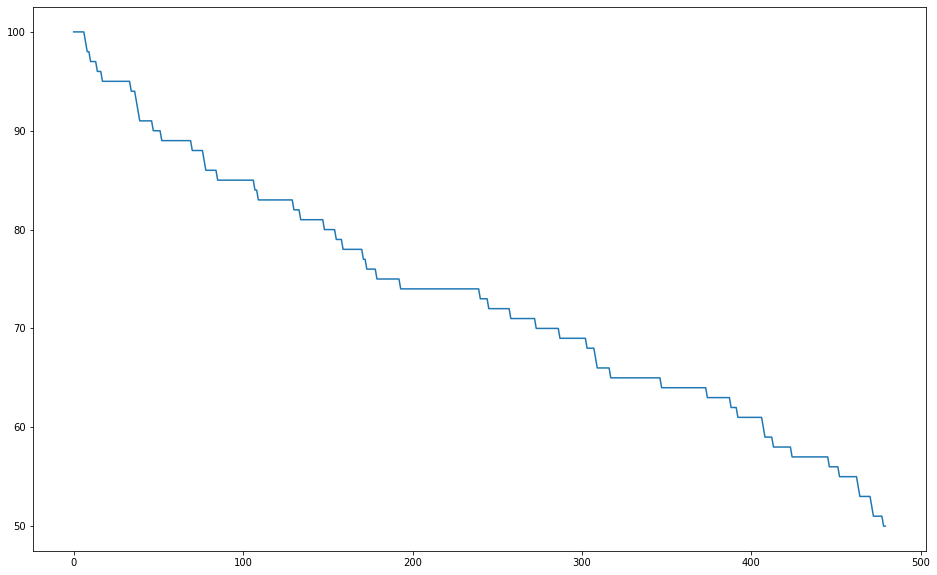

In [5]:
from numpy import random
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16,10)

SEMILLA = 31 # Valor con el que inicializamos el generador de números aleatorios
STOCK_INICIAL = 100 # Stock inicial del sistema
PASOS_SIMULACION = 8 * 60 # Número de pasos de la simulación
PROBABILIDAD_BASE = .1

historico = []

def inicializar():
    random.seed(31)
    Estado = {
        'stock': STOCK_INICIAL,
        'pasos_totales': PASOS_SIMULACION,
        'paso_actual': 0,
        'probabilidad_venta': PROBABILIDAD_BASE
    }
    return Estado

def print_estado(estado):
    print(f"""
        Stock: {estado['stock']}
        Paso actual: {estado['paso_actual']}
        Progreso: {(estado['paso_actual'] / estado['pasos_totales'])*100:.2f} %
        Probabilidad venta: {estado['probabilidad_venta']}
    """)

def pasa_un_minuto(estado):
    if random.rand() <= estado['probabilidad_venta']:
        estado['stock'] -= 1
    
def simular():
    estado = inicializar()
    historico.clear()
    print('Iniciando simulación')
    print('Estado inicial:')
    print_estado(estado)
    for _ in range(estado['pasos_totales']):
        pasa_un_minuto(estado)
        estado['paso_actual'] += 1
        historico.append(estado.copy()) #Añadimos ¡una copia completa! del diccionario
    
    print('Estado final:')
    print_estado(estado)
    return historico

def mostrar_evolucion():
    def a_hora(minuto):
        return f'{int(minuto/60):02}:{minuto%60}:02'
        
    sns.lineplot(x=[w for w in range(len(historico))], y=[x['stock'] for x in historico])
        
simular()
mostrar_evolucion()

# CORRECTO


        Stock: 0
        Paso actual: 480
        Progreso: 100.00 %
        Probabilidad venta: 0.1874
    


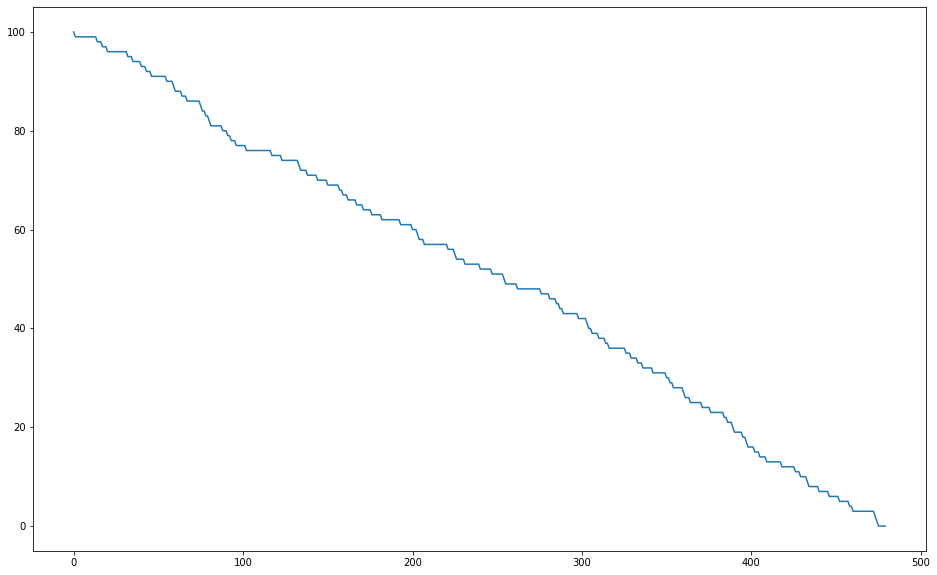

In [6]:
from numpy import random
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

plt.rcParams['figure.figsize'] = (16,10)

SEMILLA = 40 # Valor con el que inicializamos el generador de números aleatorios
STOCK_INICIAL = 100 # Stock inicial del sistema
PASOS_SIMULACION = 8 * 60 # Número de pasos de la simulación

historico = []

def inicializar():
    random.seed(SEMILLA)
    Estado = {
        'stock': STOCK_INICIAL,
        'pasos_totales': PASOS_SIMULACION,
        'paso_actual': 0,
        'probabilidad_venta': PROBABILIDAD_BASE
    }
    return Estado

def print_estado(estado):
    print(f"""
        Stock: {estado['stock']}
        Paso actual: {estado['paso_actual']}
        Progreso: {(estado['paso_actual'] / estado['pasos_totales'])*100:.2f} %
        Probabilidad venta: {estado['probabilidad_venta']}
    """)

def pasa_un_minuto(estado):
    if random.rand() <= estado['probabilidad_venta']:
        estado['stock'] -= 1
    
def simular():
    estado = inicializar()
    historico.clear()
    for _ in range(estado['pasos_totales']):
        pasa_un_minuto(estado)
        estado['paso_actual'] += 1
        historico.append(estado.copy()) #Añadimos ¡una copia! del diccionario
    
    return historico, estado

def mostrar_evolucion():
    def a_hora(minuto):
        return f'{int(minuto/60):02}:{minuto%60}:02'
        
    sns.lineplot(x=[w for w in range(len(historico))], y=[x['stock'] for x in historico])

def check_resultado(historico, estado):
    stock_final = historico[-1]['stock']
    if stock_final == 0:
        printmd('# CORRECTO')
    elif stock_final > 0:
        printmd('# Queda stock sin vender, aumenta la probabilidad')
    else:    
        printmd('# Has vendido demasiado, baja la probabilidad')
    print_estado(estado)
        
PROBABILIDAD_BASE = 0.1874

historico, estado = simular()
check_resultado(historico, estado)
mostrar_evolucion()

# Componentes fundamentales de una simulación

Una vez hemos trabajado un poquito con una simulación básica, podemos hablar de sus componentes fundamentales, estos son:
1. **Parámetros**: Parámetros/límites de la simulación
1. **Estado**: estado interno del proceso simulado
1. **Reloj**: control del "tiempo" de la simulación
1. Histórico: control de los pasos que ha dado el sistema
1. Evaluación: Evaluación final del resultado del sistema

Para trabajar una simulación con esta formalización, vamos a tratar el problema de la parada del autobús.

## Parada de autobús

Se plantea la siguiente situación, a lo largo del tiempo, va llegando gente a una parada de autobús; los autobuses pasan cada 10 minutos.

Si la probabilidad de que llegue alguien a la parada cada minuto es la misma, ¿cuál es el tiempo medio de espera en la parada de autobús?

### Los autobuses pasan exactamente cada 10 minutos, las personas llegan, como máximo, una por minuto.

Si los autobuses pasan cada 10 minutos exactos, la única variable que nos interesa es la probabilidad de que llegue alguien a la parada cada minuto durante 10 minutos.

Mientras esa probabilidad sea constante nos da igual cuál sea, supondremos un 50% de posibilidades de que llegue una persona cada minuto.

Nuestro sistema es el siguiente, simulamos, inicialmente, 1 ciclo de 10 minutos:

In [7]:
from numpy import random
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm
plt.rcParams['figure.figsize'] = (16,10)

Parametros = {
    'probabilidad_minuto': .5,
    'tiempo_entre_autobuses': 10,
    'numero_autobuses': 1,
    'semilla': 31
}

Estado = {
    'pasajeros_esperando': 0,
    'pasajeros_atendidos': 0
}

Clock = {
    'tiempo_actual': 0,
    'tiempo_total': Parametros['numero_autobuses'] * Parametros['tiempo_entre_autobuses']
}

Historico = []

def paso_simulacion(debug):
    x = random.rand()
    if x <= Parametros['probabilidad_minuto']:
        Estado['pasajeros_esperando'] += 1
        if debug:
            print(f"Llega un pasajero, hay en total {Estado['pasajeros_esperando']} pasajero(s) esperando")

def simular(debug=False):
    random.seed(Parametros['semilla'])
    Clock['tiempo_actual'] = 0
    Clock['tiempo_total'] = Parametros['numero_autobuses'] * Parametros['tiempo_entre_autobuses']
    
    for _ in range(1, Clock['tiempo_total'] + 1):
        paso_simulacion(debug)
        
        # Si llega el autobús se va todo el mundo
        if _ % Parametros['tiempo_entre_autobuses'] == 0:
            if debug:
                print(f"Llega el autobús, se suben {Estado['pasajeros_esperando']} pasajeros")
            Estado['pasajeros_atendidos'] += Estado['pasajeros_esperando']
            Estado['pasajeros_esperando'] = 0
            
        Historico.append([_, Estado['pasajeros_esperando'], Estado['pasajeros_atendidos']])

def evaluar(debug=True):
    tiempo_espera = 0
    for x in Historico:
        tiempo_espera += x[1]
    
    tiempo_medio = tiempo_espera / Historico[-1][-1]
    if(debug):
        print(f'Tiempo espera medio: {tiempo_medio:.2f}')
    return tiempo_medio
        
simular(debug=True)
evaluar()

Llega un pasajero, hay en total 1 pasajero(s) esperando
Llega un pasajero, hay en total 2 pasajero(s) esperando
Llega un pasajero, hay en total 3 pasajero(s) esperando
Llega un pasajero, hay en total 4 pasajero(s) esperando
Llega un pasajero, hay en total 5 pasajero(s) esperando
Llega el autobús, se suben 5 pasajeros
Tiempo espera medio: 4.20


4.2

si cambiamos el número de simulaciones tendremos una medida más realista:

In [8]:
Parametros['numero_autobuses'] = 100

simular(debug=False)
evaluar()

Tiempo espera medio: 4.42


4.420038535645472

In [9]:
Parametros['numero_autobuses'] = 10000

simular(debug=False)
evaluar()

Tiempo espera medio: 4.50


4.496523639253079

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:54<00:00,  1.85it/s]


<AxesSubplot:>

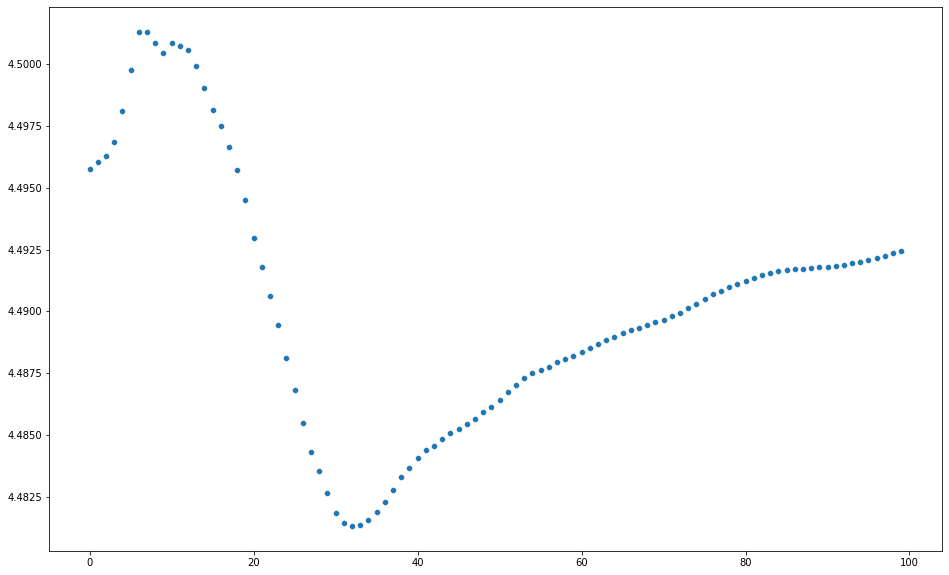

In [10]:
tiempos = []

for x in tqdm(range(1,101)):
    Parametros['numero_autobuses'] = x * 100
    simular()
    tiempos.append(evaluar(debug=False))
    
sns.scatterplot(y=tiempos, x=range(len(tiempos)))

Vemos que, con este valor inicial de la semilla, no llegamos nunca a alcanzar el valor teórico (4.5 minutos de espera media) pero estamos siempre muy cerca. 

Otros valores de la semilla inicial darían lugar a otros valores de distancia respecto al valor teórico

## Simulando con Simpy

Esta forma de plantear un modelo de simulación es conveniente cuando nuestra simulación es muy sencilla, para una simulación más compleja es conveniente utilizar un framework de simulación.

En nuestro caso utilizaremos Simpy.

**Simpy** es una librería de simulación de eventos discretos. Recordemos, un evento discreto es aquel que sucede en un momento determinado en el tiempo, lo contrario de un evento discreto es un evento continuo donde los cambios son infinitesimalmente pequeños.

Algunos ejemplos de eventos discretos pueden ser:
* Viajeros esperando en la parada del autobús
* Stock de cada producto en cada almacén
* Camiones asignados a una ruta

Algunos ejemplos de eventos continuos pueden ser:
* Volumen ocupado por un líquido según se calienta
* Consumo de combustible del camión en función de la carga, marcha y revoluciones del motor
* Duración estimada de la batería de un móvil en función de las aplicaciones cargadas, brillo de la pantalla y cobertura wifi y red móvil

(que la naturaleza de algunas simulaciones sea continua no significa que no puedan aproximarse mediante métodos discretos, pero los mejores resultados se darán cuando se trabajen con métodos adecuados como pueden ser las ecuaciones diferenciales)

Simpy tiene objetos específicos para tratar con los elementos que hemos visto hasta ahora:


0: Llega otro pasajero, hay 1 pasajeros esperando
0: Llega otro autobús, se suben 1, ya hemos atendido 1
4: Llega otro pasajero, hay 1 pasajeros esperando
5: Llega otro pasajero, hay 2 pasajeros esperando
7: Llega otro pasajero, hay 3 pasajeros esperando
8: Llega otro pasajero, hay 4 pasajeros esperando
10: Llega otro pasajero, hay 5 pasajeros esperando
11: Llega otro pasajero, hay 6 pasajeros esperando
13: Llega otro pasajero, hay 7 pasajeros esperando
14: Llega otro pasajero, hay 8 pasajeros esperando
15: Llega otro autobús, se suben 8, ya hemos atendido 9
15: Llega otro pasajero, hay 1 pasajeros esperando
16: Llega otro pasajero, hay 2 pasajeros esperando
17: Llega otro pasajero, hay 3 pasajeros esperando
18: Llega otro pasajero, hay 4 pasajeros esperando
20: Llega otro pasajero, hay 5 pasajeros esperando
21: Llega otro pasajero, hay 6 pasajeros esperando
22: Llega otro pasajero, hay 7 pasajeros esperando
25: Llega otro pasajero, hay 8 pasajeros esperando
26: Llega otro pasajero, ha

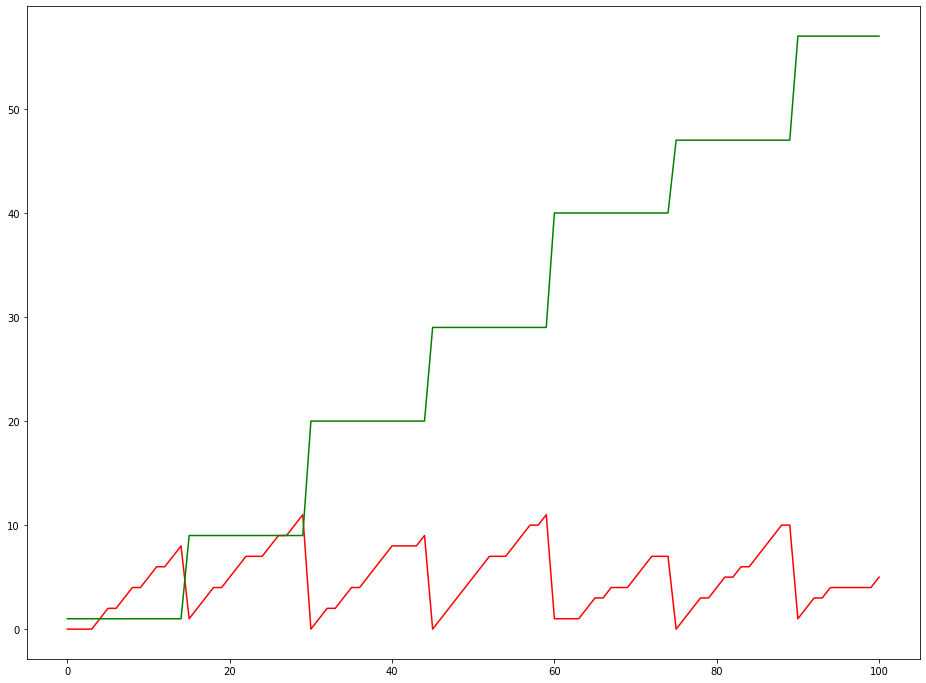

In [11]:
import simpy
from numpy import random
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16,12)

env = simpy.Environment()

Parametros = {
    'probabilidad_minuto': .5,
    'tiempo_entre_autobuses': 15,
    'numero_autobuses': 1,
    'semilla': 31,
    'pasos_simulacion': 101
}


Estado = {
    'pasajeros_esperando': 0,
    'pasajeros_atendidos': 0
}

Historico = []

def llegada_viajeros(env, timeout_inicial, debug=False):
    while True:
        if random.rand() < Parametros['probabilidad_minuto']:
            Estado['pasajeros_esperando'] += 1
            if debug:
                print (f"{env.now}: Llega otro pasajero, hay {Estado['pasajeros_esperando']} pasajeros esperando")
        yield env.timeout(1)

def llegada_autobus(env, timeout_inicial, debug=False):
    #yield env.timeout(timeout_inicial)
    while True:
        if debug:
            print(f"{env.now}: Llega otro autobús, se suben {Estado['pasajeros_esperando']}, ya hemos atendido {Estado['pasajeros_atendidos'] + Estado['pasajeros_esperando']}")
        Estado['pasajeros_atendidos'] += Estado['pasajeros_esperando']
        Estado['pasajeros_esperando'] = 0
        yield env.timeout(Parametros['tiempo_entre_autobuses'])

def almacenar_historico(env, debug=False):
    while True:
        Historico.append([env.now, Estado['pasajeros_esperando'], Estado['pasajeros_atendidos']])
        yield(env.timeout(1))
        
def simular(debug=True):
    random.seed(Parametros['semilla'])
    env.process(llegada_viajeros(env, 0, debug))
    env.process(llegada_autobus(env, Parametros['tiempo_entre_autobuses'], debug))
    env.process(almacenar_historico(env, debug))
    env.run(until=Parametros['pasos_simulacion'])
    
    visualizar_simulacion()

def visualizar_simulacion():
    plt.figure()
    
    sns.lineplot(x=[w[0] for w in Historico], y = [w[1] for w in Historico], color='red')
    sns.lineplot(x=[w[0] for w in Historico], y = [w[2] for w in Historico], color='green')
    
simular()

### Los autobuses pasan, de media, cada 10 minutos

Vamos a modificar el ejemplo anterior con Simpy para que los autobuses no pasen exactamente cada 10 minutos.

El próximo autobús llegará en 9
El próximo autobús llegará en 7
El próximo autobús llegará en 8
El próximo autobús llegará en 7
El próximo autobús llegará en 8
El próximo autobús llegará en 12
El próximo autobús llegará en 13
El próximo autobús llegará en 9
El próximo autobús llegará en 8
El próximo autobús llegará en 6
El próximo autobús llegará en 9
Tiempo medio de espera: 5.660714285714286


<Figure size 1152x864 with 0 Axes>

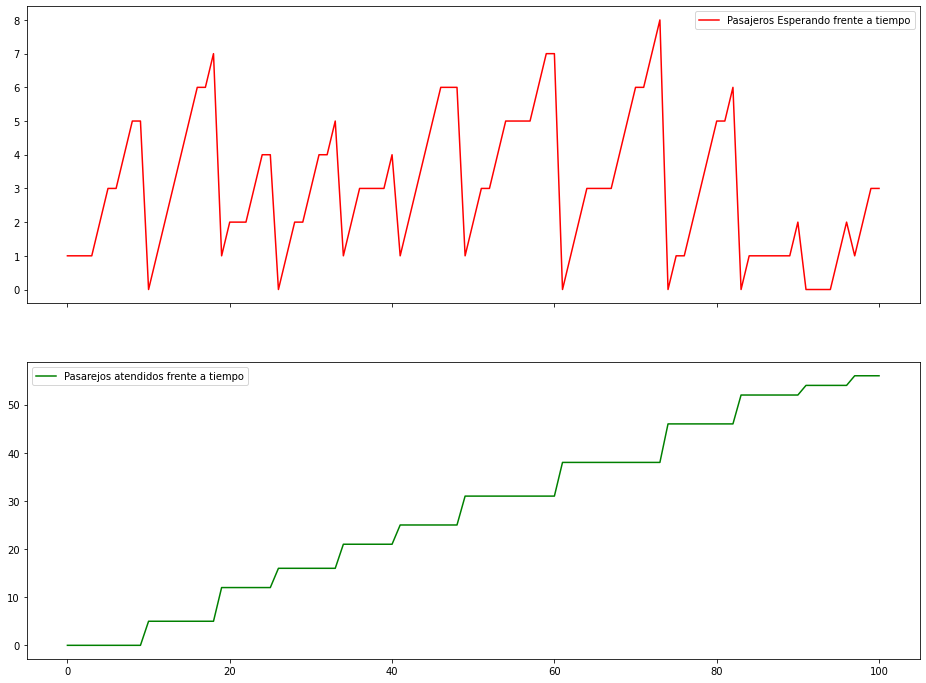

In [12]:
import simpy
import numpy as np
from numpy import random

import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16,12)

env = simpy.Environment()

Parametros = {
    'probabilidad_minuto': .5,
    'tiempo_entre_autobuses': 10,
    'desviacion': 3,
    'numero_autobuses': 1,
    'semilla': 31,
    'pasos_simulacion': 101
}


Estado = {
    'pasajeros_esperando': 0,
    'pasajeros_atendidos': 0,
    'tiempo_espera_total': 0,
    'llegada_siguiente_autobus': 0
}

Historico = []

def llegada_viajeros(env, timeout_inicial, debug=False):
    while True:
        if random.rand() < Parametros['probabilidad_minuto']:
            Estado['pasajeros_esperando'] += 1
            Estado['tiempo_espera_total'] += Estado['llegada_siguiente_autobus'] - env.now
            if debug:
                print (f"""{env.now}: Llega otro pasajero, hay {Estado['pasajeros_esperando']} pasajeros esperando,
    este pasajero esperará {Estado['llegada_siguiente_autobus'] - env.now} minutos
                       """)
        yield env.timeout(1)

def llegada_autobus(env, timeout_inicial, debug=False):
    yield env.timeout(timeout_inicial)
    
    while True:
        if debug:
            print(f"{env.now}: Llega otro autobús, se suben {Estado['pasajeros_esperando']}, ya hemos atendido {Estado['pasajeros_atendidos'] + Estado['pasajeros_esperando']}")
        Estado['pasajeros_atendidos'] += Estado['pasajeros_esperando']
        Estado['pasajeros_esperando'] = 0
        t = random.normal(Parametros['tiempo_entre_autobuses'], Parametros['desviacion'])
        Estado['llegada_siguiente_autobus'] = env.now + int(t)
        print (f'El próximo autobús llegará en {int(t)}')
        yield env.timeout(int(t))

def almacenar_historico(env, debug=False):
    while True:
        Historico.append([env.now, Estado['pasajeros_esperando'], Estado['pasajeros_atendidos']])
        yield(env.timeout(1))
        
def simular(debug=False):
    Estado['llegada_siguiente_autobus'] = Parametros['tiempo_entre_autobuses']
    random.seed(Parametros['semilla'])
    env.process(llegada_viajeros(env, 0, debug))
    env.process(llegada_autobus(env, Parametros['tiempo_entre_autobuses'], debug))
    env.process(almacenar_historico(env, debug))
    env.run(until=Parametros['pasos_simulacion'])
    
    visualizar_simulacion()

def visualizar_simulacion():
    plt.figure()
    fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
    
    tiempos = np.array(Historico)
    
    sns.lineplot(x=tiempos[:,0], y = tiempos[:,1], color='red', ax=ax1, label='Pasajeros Esperando frente a tiempo')
    sns.lineplot(x=tiempos[:,0], y = tiempos[:,2], color='green', ax=ax2, label='Pasarejos atendidos frente a tiempo')
        
    print(f"Tiempo medio de espera: {Estado['tiempo_espera_total'] / Estado['pasajeros_atendidos']}")
ax = simular()

## Ejemplo 2: cola de un supermercado

Una evolución sobre el ejemplo anterior y que nos permitirá profundizar en la elaboración de un modelo de simulación más completo es el número de personas que hacen cola en un supermercado (o en un banco, en un médico...).

En este caso hay una diferencia sustancial y es que, mientras que en un autobús todo el mundo puede pasar (suponiendo que estemos dentro de la capacidad del autobús), en una cola de supermercado la caja es un **recurso compartido**.

En simulación se llama **recurso compartido** a aquel que no puede ser utilizado de forma simultáneamente por más de un proceso.

Estos recursos tienen una **cola** que indica el orden en el que atenderán las peticiones.

El siguiente código muesra un ejemplo de uso de un recurso con capacidad limitada en Simpy


In [13]:
import simpy

# Iniciamos el entorno
env = simpy.Environment()

# Iniciamos la cola
cola = simpy.Resource(env)

# Creamos un proceso que intentará acceder a la cola y esperará mientras no pueda hacerlo
def proceso_espera(env, cola, x):
    # Accedemos a la cola de peticiones
    r = cola.request()
    print(f'{env.now}: proceso {x}, pidiendo acceso, hay {len(cola.queue)} elementos en cola')
    # Pedimos acceso
    yield r
    # Cuando conseguimos acceso informamos
    print(f'{env.now}: proceso {x}, conseguido acceso, hay {len(cola.queue)} elementos en cola')
    # y bloqueamos la cola durante 10 unidades de tiempo
    yield env.timeout(10)
    # al terminar hay que desbloquear el recurso
    print(f'{env.now}: proceso {x}, liberando uso de la cola')
    cola.release(r)
    
# Creamos varias copias de este proceso
env.process(proceso_espera(env, cola, 1))
env.process(proceso_espera(env, cola, 2))
env.process(proceso_espera(env, cola, 3))
env.process(proceso_espera(env, cola, 4))
env.process(proceso_espera(env, cola, 5))

# Simulamos 60 pasos del proceso
env.run(until=60)

0: proceso 1, pidiendo acceso, hay 0 elementos en cola
0: proceso 2, pidiendo acceso, hay 1 elementos en cola
0: proceso 3, pidiendo acceso, hay 2 elementos en cola
0: proceso 4, pidiendo acceso, hay 3 elementos en cola
0: proceso 5, pidiendo acceso, hay 4 elementos en cola
0: proceso 1, conseguido acceso, hay 4 elementos en cola
10: proceso 1, liberando uso de la cola
10: proceso 2, conseguido acceso, hay 3 elementos en cola
20: proceso 2, liberando uso de la cola
20: proceso 3, conseguido acceso, hay 2 elementos en cola
30: proceso 3, liberando uso de la cola
30: proceso 4, conseguido acceso, hay 1 elementos en cola
40: proceso 4, liberando uso de la cola
40: proceso 5, conseguido acceso, hay 0 elementos en cola
50: proceso 5, liberando uso de la cola


Los recursos de capacidad limitada no están restringidos a atender a un único proceso de forma simultánea.

Podemos crear recursos que sean capaces de atender cualquier número de peticiones:

In [14]:
import simpy

# Iniciamos el entorno
env = simpy.Environment()

# Iniciamos la cola
cola = simpy.Resource(env, capacity=2)

# Creamos un proceso que intentará acceder a la cola y esperará mientras no pueda hacerlo
def proceso_espera(env, cola, x):
    # Accedemos a la cola de peticiones
    r = cola.request()
    print(f'{env.now}: proceso {x}, pidiendo acceso, hay {len(cola.queue)} elementos en cola')
    # Pedimos acceso
    yield r
    # Cuando conseguimos acceso informamos
    print(f'{env.now}: proceso {x}, conseguido acceso, hay {len(cola.queue)} elementos en cola')
    # y bloqueamos la cola durante 10 unidades de tiempo
    yield env.timeout(10)
    print(f'{env.now}: proceso {x}, liberando uso de la cola')
    # al terminar hay que desbloquear el recurso
    cola.release(r)
    
# Creamos varias copias de este proceso
env.process(proceso_espera(env, cola, 1))
env.process(proceso_espera(env, cola, 2))
env.process(proceso_espera(env, cola, 3))
env.process(proceso_espera(env, cola, 4))
env.process(proceso_espera(env, cola, 5))

# Simulamos 60 pasos del proceso
env.run(until=60)

0: proceso 1, pidiendo acceso, hay 0 elementos en cola
0: proceso 2, pidiendo acceso, hay 0 elementos en cola
0: proceso 3, pidiendo acceso, hay 1 elementos en cola
0: proceso 4, pidiendo acceso, hay 2 elementos en cola
0: proceso 5, pidiendo acceso, hay 3 elementos en cola
0: proceso 1, conseguido acceso, hay 3 elementos en cola
0: proceso 2, conseguido acceso, hay 3 elementos en cola
10: proceso 1, liberando uso de la cola
10: proceso 2, liberando uso de la cola
10: proceso 3, conseguido acceso, hay 1 elementos en cola
10: proceso 4, conseguido acceso, hay 1 elementos en cola
20: proceso 3, liberando uso de la cola
20: proceso 4, liberando uso de la cola
20: proceso 5, conseguido acceso, hay 0 elementos en cola
30: proceso 5, liberando uso de la cola


### Recursos en Simpy

1. Se crean con una capacidad (1 si no indicamos nada)
1. Para acceder a ellos lo hacemos a través de su cola de peticiones `nombre_cola.request()`
1. Se pide acceso a ellos con `yield nombre_petición`
1. Una vez se consigue acceso a la cola lo bloqueamos durante el tiempo necesario según nuestro proceso
1. Después de utilizar el recurso debemos liberarlo con `nombre_cola.release(nombre_peticion)`


### Cola del supermercado
Con esta información ya podemos crear nuestro modelo sencillo de cola de supermercado.

Tendremos, inicialmente, una única caja abierta e irán llegando clientes en cada minuto tendremos una probabilidad de que llegue un cliente de un 10%, cada cliente bloquea la caja durante 8 minutos mientras le preparan la mercancía y realiza el pago.



7: Soy el cliente 1, tengo el puesto 0 en la cola, saldré aproximadamente a 14
7: Soy el cliente 1, acaban de empezar a atenderme, saldré aproximadamente a 15
8: Soy el cliente 2, tengo el puesto 1 en la cola, saldré aproximadamente a 23
10: Soy el cliente 3, tengo el puesto 2 en la cola, saldré aproximadamente a 33
14: Soy el cliente 4, tengo el puesto 3 en la cola, saldré aproximadamente a 45
15: Soy el cliente 1 y me han atendido
15: Soy el cliente 2, acaban de empezar a atenderme, saldré aproximadamente a 23
17: Soy el cliente 5, tengo el puesto 3 en la cola, saldré aproximadamente a 48
23: Soy el cliente 2 y me han atendido
23: Soy el cliente 3, acaban de empezar a atenderme, saldré aproximadamente a 31
31: Soy el cliente 3 y me han atendido
31: Soy el cliente 4, acaban de empezar a atenderme, saldré aproximadamente a 39
34: Soy el cliente 6, tengo el puesto 2 en la cola, saldré aproximadamente a 57
37: Soy el cliente 7, tengo el puesto 3 en la cola, saldré aproximadamente a 68
38

<Figure size 1152x864 with 0 Axes>

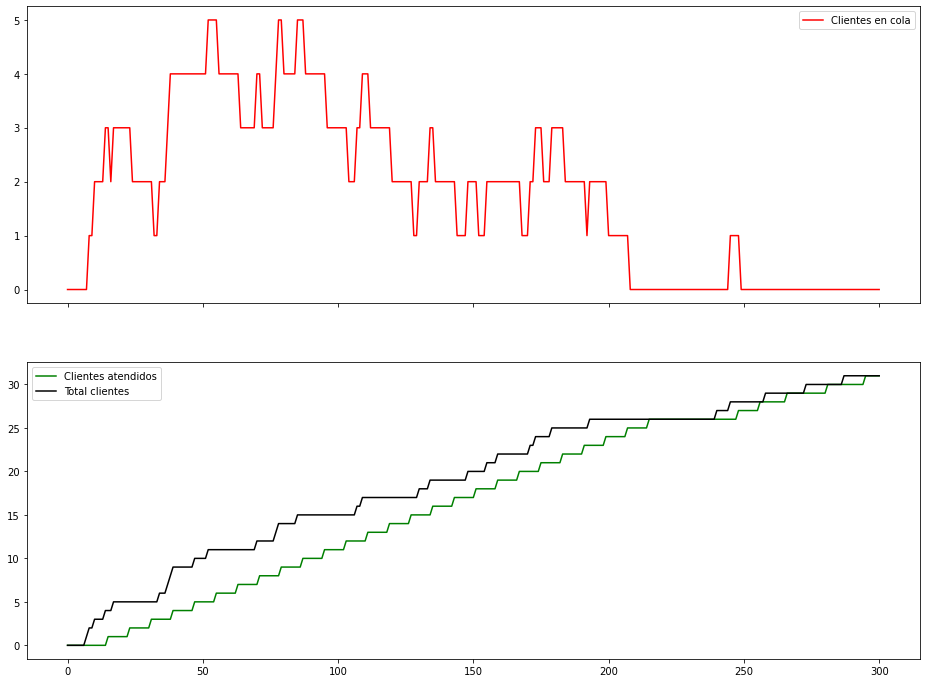

In [15]:
import simpy
import numpy as np
from numpy import random

import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16,12)

Parametros = {
    'probabilidad_minuto': .10,
    'semilla': 31,
    'tiempo_caja': 8,
    'pasos_simulacion': 301
}


Estado = {
    'clientes_en_cola': 0,
    'clientes_atendidos': 0,
    'clientes_entraron': 0
}

Historico = []

def encolar_cliente(env, cola, id_cliente, debug=False):
    #while True:
    r = cola.request()
    puesto = len(cola.queue)

    if debug:
        print (f"{env.now}: Soy el cliente {id_cliente}, tengo el puesto {puesto} en la cola, saldré aproximadamente a {env.now - 1 + (puesto + 1) *  Parametros['tiempo_caja']}")
    yield r

    if debug:
        print (f"{env.now}: Soy el cliente {id_cliente}, acaban de empezar a atenderme, saldré aproximadamente a {env.now + Parametros['tiempo_caja']}")
    yield env.timeout(Parametros['tiempo_caja'])

    if debug:
        print(f"{env.now}: Soy el cliente {id_cliente} y me han atendido")
    Estado['clientes_atendidos'] += 1
    cola.release(r)
    #break
    
def llegada_cliente(env, cola, debug=False):
    while True:
        if random.rand() < Parametros['probabilidad_minuto']:
            Estado['clientes_entraron'] += 1
            env.process(encolar_cliente(env, cola, Estado['clientes_entraron'], debug))
            
        yield env.timeout(1)

def inicializar_caja(env):
    caja = simpy.Resource(env)
    return caja
        
def almacenar_historico(env, cola, debug=False):
    while True:
        Historico.append([env.now, len(cola.queue), Estado['clientes_atendidos'], Estado['clientes_entraron']])
        yield(env.timeout(1))
        
def simular(debug=False):
    random.seed(Parametros['semilla'])
    Historico = []
    env = simpy.Environment()
    
    caja = inicializar_caja(env)
    
    env.process(llegada_cliente(env, caja, debug))
    env.process(almacenar_historico(env, caja, debug))
    env.run(until=Parametros['pasos_simulacion'])
    
    visualizar_simulacion()

def visualizar_simulacion():
    plt.figure()
    fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
    
    tiempos = np.array(Historico)
    
    sns.lineplot(x=tiempos[:,0], y = tiempos[:,1], color='red', ax=ax1, label='Clientes en cola')
    sns.lineplot(x=tiempos[:,0], y = tiempos[:,2], color='green', ax=ax2, label='Clientes atendidos')
    sns.lineplot(x=tiempos[:,0], y = tiempos[:,3], color='black', ax=ax2, label='Total clientes')
    
        
    
simular(True)

Si aumentamos la probabilidad de que entre gente por minuto

<Figure size 1152x864 with 0 Axes>

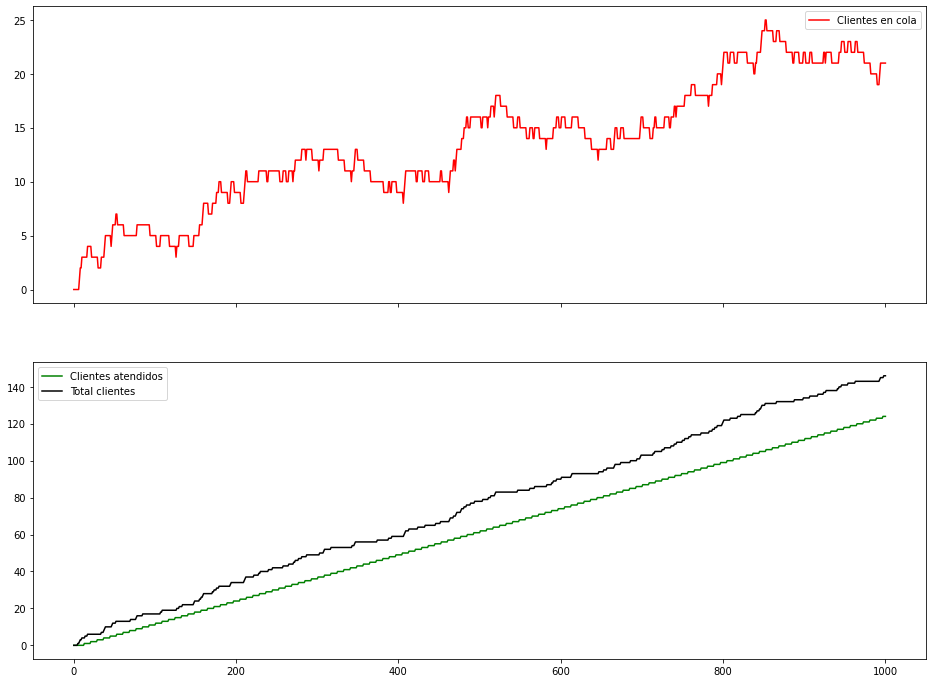

In [16]:
import simpy
import numpy as np
from numpy import random

import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16,12)

Parametros = {
    'probabilidad_minuto': .15,
    'semilla': 31,
    'tiempo_caja': 8,
    'pasos_simulacion': 1001
}


Estado = {
    'clientes_en_cola': 0,
    'clientes_atendidos': 0,
    'clientes_entraron': 0
}

Historico = []

def encolar_cliente(env, cola, id_cliente, debug=False):
    #while True:
    r = cola.request()
    puesto = len(cola.queue)

    if debug:
        print (f"{env.now}: Soy el cliente {id_cliente}, tengo el puesto {puesto} en la cola, saldré aproximadamente a {env.now - 1 + (puesto + 1) *  Parametros['tiempo_caja']}")
    yield r

    if debug:
        print (f"{env.now}: Soy el cliente {id_cliente}, acaban de empezar a atenderme, saldré aproximadamente a {env.now + Parametros['tiempo_caja']}")
    yield env.timeout(Parametros['tiempo_caja'])

    if debug:
        print(f"{env.now}: Soy el cliente {id_cliente} y me han atendido")
    Estado['clientes_atendidos'] += 1
    cola.release(r)
    #break
    
def llegada_cliente(env, cola, debug=False):
    while True:
        if random.rand() < Parametros['probabilidad_minuto']:
            Estado['clientes_entraron'] += 1
            env.process(encolar_cliente(env, cola, Estado['clientes_entraron'], debug))
            
        yield env.timeout(1)

def inicializar_caja(env):
    caja = simpy.Resource(env)
    return caja
        
def almacenar_historico(env, cola, debug=False):
    while True:
        Historico.append([env.now, len(cola.queue), Estado['clientes_atendidos'], Estado['clientes_entraron']])
        yield(env.timeout(1))
        
def simular(debug=False):
    random.seed(Parametros['semilla'])
    Historico = []
    env = simpy.Environment()
    
    caja = inicializar_caja(env)
    
    env.process(llegada_cliente(env, caja, debug))
    env.process(almacenar_historico(env, caja, debug))
    env.run(until=Parametros['pasos_simulacion'])
    
    visualizar_simulacion()

def visualizar_simulacion():
    plt.figure()
    fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
    
    tiempos = np.array(Historico)
    
    sns.lineplot(x=tiempos[:,0], y = tiempos[:,1], color='red', ax=ax1, label='Clientes en cola')
    sns.lineplot(x=tiempos[:,0], y = tiempos[:,2], color='green', ax=ax2, label='Clientes atendidos')
    sns.lineplot(x=tiempos[:,0], y = tiempos[:,3], color='black', ax=ax2, label='Total clientes')
        
    
simular(False)

### La simulación como generador de escenarios

Si nuestro modelo de simulación se comporta conforme nosotros pensamos, lo que querremos será evaluar cómo cambia en función de diferentes parámetros.

Nuestro modelo se basa en dos parámetros:
1. Probabilidad de que venga alguien a caja
1. Tiempo que tarda en ser atendido en caja

Aunque es un modelo muy sencillo puede ser interesante realizar una exploración manual de estos valores para ver cómo interactúan.

Para ello podemos utilizar widgets de Jupyter, que son controles con los que podemos interactuar en el cuaderno, por ejemplo, barras deslizantes, botones,..

De esta forma tendremos un cuaderno con el que podemos hacer pruebas de forma más sencilla.


In [29]:
import simpy
import numpy as np
from numpy import random

import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16,12)

Parametros = {
    'probabilidad_minuto': .25,
    'semilla': 31,
    'tiempo_caja': 8,
    'pasos_simulacion': 1001
}


Estado = {
    'clientes_atendidos': 0,
    'clientes_entraron': 0
}

Historico = []

def encolar_cliente(env, cola, id_cliente, debug=False):
    #while True:
    r = cola.request()
    puesto = len(cola.queue)

    if debug:
        print (f"{env.now}: Soy el cliente {id_cliente}, tengo el puesto {puesto} en la cola, saldré aproximadamente a {env.now - 1 + (puesto + 1) *  Parametros['tiempo_caja']}")
    yield r

    if debug:
        print (f"{env.now}: Soy el cliente {id_cliente}, acaban de empezar a atenderme, saldré aproximadamente a {env.now + Parametros['tiempo_caja']}")
    yield env.timeout(Parametros['tiempo_caja'])

    if debug:
        print(f"{env.now}: Soy el cliente {id_cliente} y me han atendido")
    Estado['clientes_atendidos'] += 1
    cola.release(r)
    #break
    
def llegada_cliente(env, cola, debug=False):
    while True:
        if random.rand() < Parametros['probabilidad_minuto']:
            Estado['clientes_entraron'] += 1
            env.process(encolar_cliente(env, cola, Estado['clientes_entraron'], debug))
            
        yield env.timeout(1)

def inicializar_caja(env):
    caja = simpy.Resource(env)
    return caja
        
def almacenar_historico(env, cola, debug=False):
    while True:
        Historico.append([env.now, len(cola.queue), Estado['clientes_atendidos'], Estado['clientes_entraron']])
        yield(env.timeout(1))

def inicializar():
    Historico.clear()
    out.clear_output()
    Estado['clientes_atendidos'] = 0
    Estado['clientes_entraron'] = 0
    Parametros['tiempo_caja'] = w.value
    Parametros['probabilidad_minuto'] = w2.value
        
def simular(debug=False):
    random.seed(Parametros['semilla'])
    inicializar()
    with out:
        print(f'Utilizando valor de tiempo: {w.value}')
        print(f'Utilizando probabilidad: {w2.value}')
        print(f'Mostrar debug: {cb.value}')
    
    env = simpy.Environment()
    
    caja = inicializar_caja(env)
    
    env.process(llegada_cliente(env, caja, cb.value))
    env.process(almacenar_historico(env, caja, cb.value))
    env.run(until=Parametros['pasos_simulacion'])
    
    visualizar_simulacion()

def visualizar_simulacion():
    tiempos = np.array(Historico)
    
    with out:
        fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

        sns.lineplot(x=tiempos[:,0], y = tiempos[:,1], color='red', ax=ax1, label='Clientes en cola')
        sns.lineplot(x=tiempos[:,0], y = tiempos[:,2], color='green', ax=ax2, label='Clientes atendidos')
        sns.lineplot(x=tiempos[:,0], y = tiempos[:,3], color='black', ax=ax2, label='Total clientes')
        plt.show(fig)
    


import ipywidgets as widgets

from IPython.display import display
w = widgets.IntSlider(5,5,15, description='Tiempo de atención en caja')
w.layout={'width':'50%'}

w2 = widgets.FloatSlider(value=.1,min=.01,max=.20, step=0.01, description='Probabilidad de entrada de cliente por minuto')
w2.layout={'width':'50%'}

hb = widgets.HBox([w, w2])
display(hb)

cb = widgets.Checkbox(description='Mostrar Debug', value=False)

b = widgets.Button(description='Iniciar', icon='play')
b.layout={'width': '50%'}
b.on_click(simular)

hb2 = widgets.HBox([b,cb])
display(hb2)

out = widgets.Output(layout={'border':'1px solid black'})
display(out)



Output(layout=Layout(border='1px solid black'))

### Evaluación de escenarios automatizada

Por último, ya que tenemos el código que es capaz de generar los escenarios en varias situaciones, podemos utilizar esta informacion para generar cientos de escenarios que nos ayuden a tomar decisiones.

Vamos a automatizar el testeo de escenarios en función de:
1. Número de cajas
1. Tiempo en caja
1. Asistencia



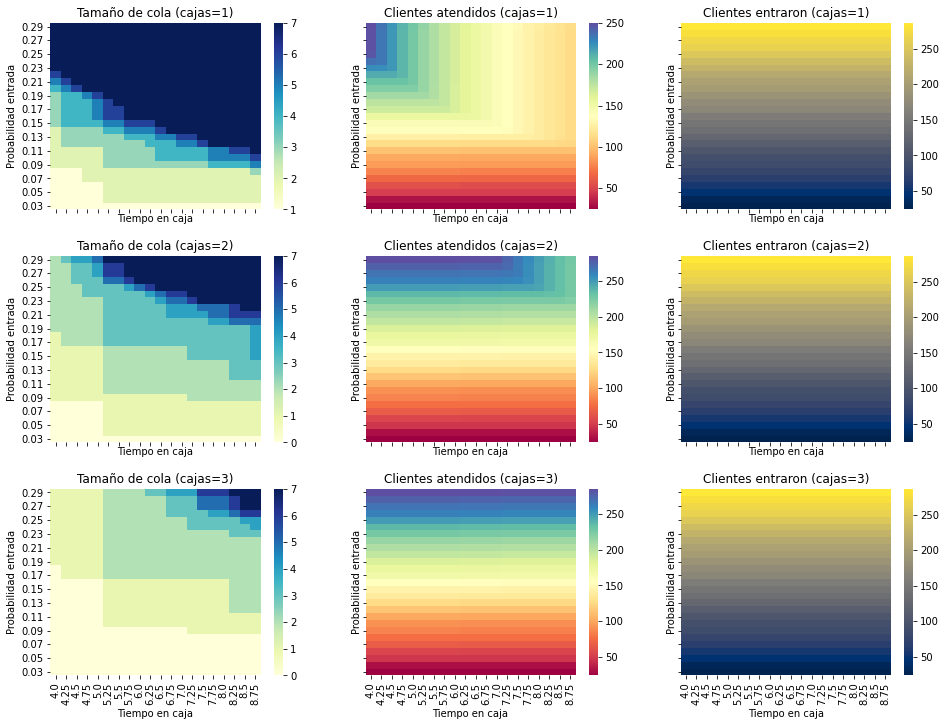

In [30]:
import simpy
import numpy as np
import pandas as pd
from numpy import random

import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16,12)

Parametros = {
    'probabilidad_minuto': .25,
    'semilla': 31,
    'tiempo_caja': 8,
    'pasos_simulacion': 1001,
    'numero_cajas': 1
}


Estado = {
    'clientes_atendidos': 0,
    'clientes_entraron': 0
}

Historico = []

def encolar_cliente(env, cola, id_cliente, debug=False):
    #while True:
    r = cola.request()
    puesto = len(cola.queue)

    if debug:
        print (f"{env.now}: Soy el cliente {id_cliente}, tengo el puesto {puesto} en la cola, saldré aproximadamente a {env.now - 1 + (puesto + 1) *  Parametros['tiempo_caja']}")
    yield r

    if debug:
        print (f"{env.now}: Soy el cliente {id_cliente}, acaban de empezar a atenderme, saldré aproximadamente a {env.now + Parametros['tiempo_caja']}")
    yield env.timeout(Parametros['tiempo_caja'])

    if debug:
        print(f"{env.now}: Soy el cliente {id_cliente} y me han atendido")
    Estado['clientes_atendidos'] += 1
    cola.release(r)
    #break
    
def llegada_cliente(env, cola, debug=False):
    while True:
        if random.rand() < Parametros['probabilidad_minuto']:
            Estado['clientes_entraron'] += 1
            env.process(encolar_cliente(env, cola, Estado['clientes_entraron'], debug))
            
        yield env.timeout(1)

def inicializar_caja(env):
    caja = simpy.Resource(env, capacity=Parametros['numero_cajas'])
    return caja
        
def almacenar_historico(env, cola, debug=False):
    while True:
        Historico.append([env.now, len(cola.queue), Estado['clientes_atendidos'], Estado['clientes_entraron']])
        yield(env.timeout(1))
        
def simular(debug=False):
    random.seed(Parametros['semilla'])
    Historico.clear()
    Estado['clientes_atendidos'] = 0
    Estado['clientes_entraron'] = 0
    
    env = simpy.Environment()
    
    caja = inicializar_caja(env)
    
    env.process(llegada_cliente(env, caja, debug))
    env.process(almacenar_historico(env, caja, debug))
    env.run(until=Parametros['pasos_simulacion'])


evaluacion = []
    
for cajas in range(1,4):
    for tiempo in np.arange(4,9, .25):
        for probabilidad_minuto in np.arange(0.03,0.3, 0.01):
            Parametros['probabilidad_minuto'] = probabilidad_minuto
            Parametros['tiempo_caja'] = tiempo
            Parametros['numero_cajas'] = cajas
            
            simular(False)
            datos = np.array(Historico)
            max_personas = np.max(datos[:,1])
            personas_atendidas = Historico[-1][2]
            personas_entraron = Historico[-1][3]
            
            evaluacion.append([cajas, tiempo, probabilidad_minuto, max_personas, personas_atendidas, personas_entraron])
            
df = pd.DataFrame(evaluacion, columns =['Cajas', 'Tiempo en caja', 'Probabilidad entrada', 'Tamaño cola', 'Atendidos', 'Entraron'])
df['Probabilidad entrada'] = df['Probabilidad entrada'].apply(lambda x: '{0:.2f}'.format(x))



fig, axs = plt.subplots(3,3, sharex=True, sharey=True, gridspec_kw={'hspace': 0.25})

for x in range(1,4):
    graficos = axs[x-1]
    
    g1 = ['Probabilidad entrada', 'Tiempo en caja', 'Tamaño cola']
    g2 = ['Probabilidad entrada', 'Tiempo en caja', 'Atendidos']
    g3 = ['Probabilidad entrada', 'Tiempo en caja', 'Entraron']
    
    df1 = df.loc[df['Cajas'] == x][['Probabilidad entrada', 'Tiempo en caja', 'Tamaño cola']].pivot('Probabilidad entrada', 'Tiempo en caja', 'Tamaño cola')
    df2 = df.loc[df['Cajas'] == x][['Probabilidad entrada', 'Tiempo en caja', 'Atendidos']].pivot('Probabilidad entrada', 'Tiempo en caja', 'Atendidos')
    df3 = df.loc[df['Cajas'] == x][['Probabilidad entrada', 'Tiempo en caja', 'Entraron']].pivot('Probabilidad entrada', 'Tiempo en caja', 'Entraron')
    
    sns.heatmap(data=df1, vmax=7, cmap='YlGnBu', ax=graficos[0], label='Tamaño cola')
    sns.heatmap(data=df2, cmap='Spectral', ax=graficos[1], label='Cl. Atendidos')
    sns.heatmap(data=df3, cmap='cividis', ax=graficos[2], label='Cl. Entraron')
    
    graficos[0].invert_yaxis()
    graficos[1].invert_yaxis()
    graficos[2].invert_yaxis()

    graficos[0].set_title(f'Tamaño de cola (cajas={x})')
    graficos[1].set_title(f'Clientes atendidos (cajas={x})')
    graficos[2].set_title(f'Clientes entraron (cajas={x})')

# Por qué simular

¿Estamos obteniendo alguna ventaja al utilizar simluación frente a tratar de encontrar las ecuaciones de este sistema y resolverlas?

## La ecuación del sistema

La ecuación (o ecuaciones del sistema), son el conjunto de funciones aritméticas que podríamos utilizar para obtener un resultado comparable al que está devolviendo la simulación.

En este caso, para conocer la cola mínima al final del día de nuestro sistema (clientes sin atender), podríamos utilizar las siguientes ecuaciones:

$$ \text{Clientes totales} = \text{Tiempo apertura (minutos)} \times \text{Probabilidad cliente minuto} $$

$$ \text{Clientes atendidos (max)} = \frac{\text{Tiempo apertura (minutos)}}{\text{Tiempo atención en caja (minutos)}} \times \text{Número cajas} $$

$$ \text{Cola al final del día (mín)} = \text{Clientes totales} - \text{Clientes atendidos (max)} $$

Si calculamos los valores para una caja obtenemos:

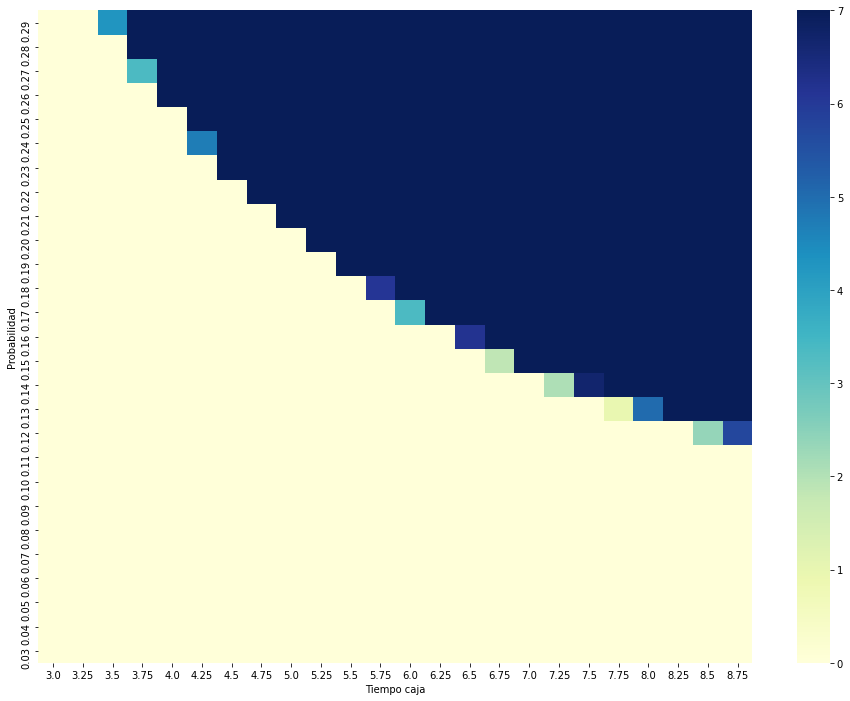

In [19]:
tiempo = 1001
cajas = 1

res = []

for prob in np.arange(0.03, 0.3, 0.01):
    for tc in np.arange(3, 9, .25):
        tam_cola = max([(tiempo * prob) - ((tiempo/tc) * cajas), 0])
        res.append([prob, tc, tam_cola])
    

df = pd.DataFrame(res, columns = ['Probabilidad', 'Tiempo caja', 'Clientes cola'])
df['Probabilidad'] = df['Probabilidad'].apply(lambda x: '{0:.2f}'.format(x))
p1 = df.pivot('Probabilidad', 'Tiempo caja', 'Clientes cola')

fig = plt.figure()
sns.heatmap(data=p1, vmax=7, cmap='YlGnBu', label='Tamaño cola')

fig.axes[0].invert_yaxis()

El problema que vemos es que, al comparar con la simulación, lo único que nos dice este modelo cuantitativo es a partir de qué umbrales vamos a tener clientes sin atender **seguro** al final del día.

El problema es que el modelo cuantitativo supone que vamos a atender gente de forma continuada desde el minuto cero, mientras que nosotros sabemos que no vamos a poder atender a nadie antes de que llegue a la cola. Al mismo tiempo, en un caso real, habrá momentos en que la cola esté vacía ya que los clientes no llegan de forma continua y perfectamente distribuida.

Además, con los modelos cuantitativos tendríamos muchas dificultades para obtener algunas variables que pueden ser de interés para nuestro sistema: 
1. Máximo de personas en cola
1. Tiempo medio de espera por persona

## Ventajas de una simulación

En el caso que acabamos de ver, las ecuaciones del sistema nos dan algún valor del sistema pero no lo definen por completo. 

En este caso, además, nuestro sistema era extremadamente sencillo, con un único recurso compartido y con una probabilidad fija de asistencia por minuto en cada minuto.

En situaciones más realistas esto no será así, para un supermercado podríamos plantear un sistema más complejo que incluyese, por ejemplo:

* Una función de asistencia que depende de la hora del día
* Un tiempo en tienda que depende del día de la semana y día del mes
* Un tiempo que el cliente puede ir a la carnicería, frutería, pescadería,... departamentos donde hay otras colas de espera
* Un tiempo en cola que dependa del número de productos que ha comprado y de la forma de pago que escoja

Este aumento de la complejidad, que puede acercarse un poco más a la interacción de los clientes en un supermercado real, 


# Modelo conceptual de una simulación

El modelo conceptual de la simulación es el paso previo a la escritura de la simulación en código.

Crear un modelo conceptual requiere conocer muy bien el sistema con el que vamos a trabajar; inicialmente podemos partir de una simplificación muy sencilla como en el modelo de la caja que puede ayudarnos a entender un poco mejor cómo podemos parametrizar nuestro sistema y qué es importante y qué no.

En nuestro ejemplo, hemos supuesto que todo el mundo tarda el mismo tiempo en pagar, lo que puede ser correcto o no dependiendo de múltiples factores (medio de pago, número de items, edad del cliente, experiencia del cajero...); para poder realizar una simulación con éxito de este sistema real sería preciso profundizar en cada paso del proceso y ver cómo se puede modelar.

## Elementos del modelo conceptual

El modelo conceptual de una simulación incluye varios elementos:
1. Entidad
1. Estado
1. Evento
1. Actividad

### Entidad
Representa un objeto/persona en nuestro sistema, ya sea físico o lógico (una página web de pago electrónico sería una entidad).

Una entidad puede ser estática (no se mueve por el sistema) o dinámica (se mueve por el sistema).

Las entidades pueden tener:
1. Estado interno
1. Atributos

### Estado
El estado puede referirse al estado de una Entidad o al estado completo de la simulación.

Nuestra conceptualización de Estado contendrá todo aquello que necesitamos para determinar las características particulares de un elemento, por ejemplo, en la caja podríamos tener en el Estado el dinero que hemos cobrado en efectivo y, requerir, cada cierta cantidad de efectivo, el envío de ese dinero a la oficina.

Otros atributos de estado que pueden ser útiles según nuestra simulación pueden ser la edad del cliente, el método de pago que va a utilizar...

Es habitual separar las variables de estado en dos conjuntos independientes:
1. Estado propiamente dicho (comprando, atendido,...)
1. Atributos (almacenan información de la entidad: forma de pago preferida...)

### Evento

Un evento es la ocurrencia de algo que hace que el estado de nuestro sistema o nuestras entidades cambie, por ejemplo, un evento es la llegada de clientes a la cola o su salida después de ser atendidos; en el caso del Estado decíamos que puede ser necesario retirar dinero en efectivo de una caja, cuando eso sucede se lanzaría el evento *Retirada efectivo* que podría afectar a diferentes entidades, por ejemplo:
* Podría reservar el recurso de la caja durante un tiempo determinado
* Podría provocar el cambio de cola de los clientes
* Podría forzar el cierre de alguna línea de atención en otros departamentos

### Actividad

Una actividad es la ejecución de una acción por parte del sistema, pueden darse:
* Con un cronómetro específico: al llegar a tiempo 300 empezamos con los procesos de cuadre de caja
* A partir de un evento: en el momento en que el dinero en caja alcanza los 500 €, lanzamos el evento de "efectivo elevado" y eso provoca el comienzo de la actividad de "retirada de efectivo"



# Simulando un supermercado

Para entender mejor toda las capacidades de la simulación es preciso realizar un ejemplo un poco más amplio.

Simularemos la operativa básica de un supermercado.

## Parámetros básicos

1. El supermercado está abierto durante 10 horas
1. En todo el dia vienen 1000 personas

## Asistencia de clientes
La asistencia de clientes sigue la siguiente forma (obtenida de Google para un supermercado real):

![Asistencia](images/asistencia_supermercado.png)

Para conseguir esta asistencia partimos de una función sinusoidal y la multiplicamos por el número de personas que queremos que venga:

<AxesSubplot:>

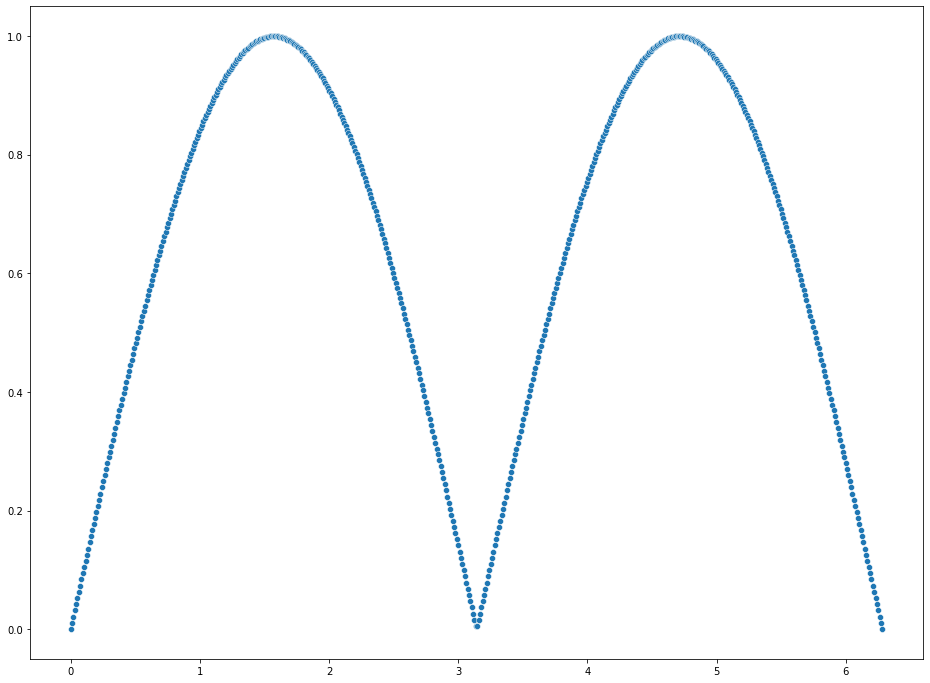

In [20]:
x = np.linspace(0, 2 * np.pi, 600)
y = abs(np.sin(x))

sns.scatterplot(x=x, y=y)

<AxesSubplot:>

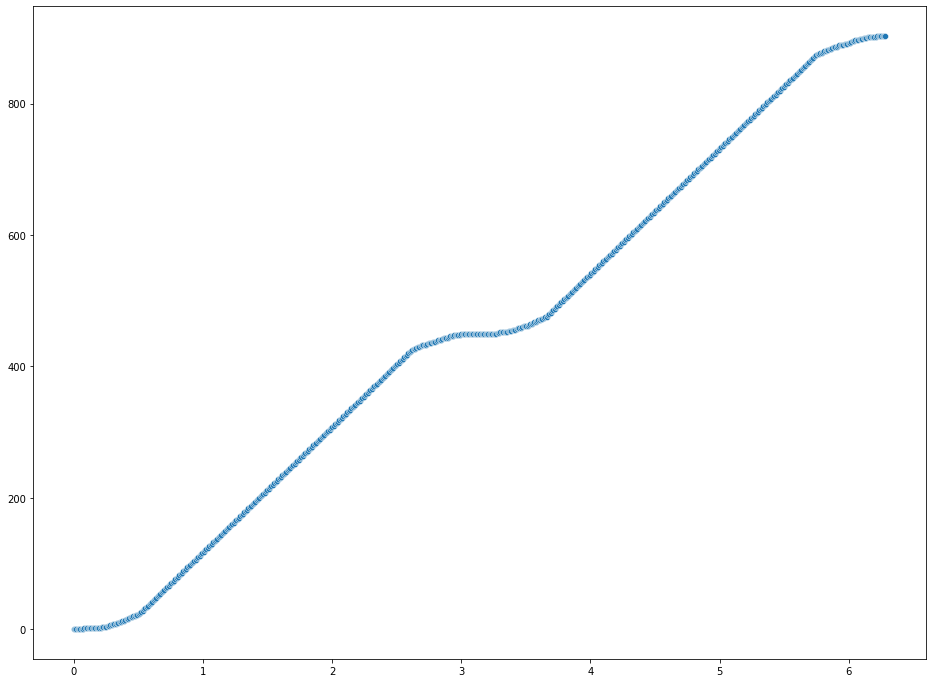

In [21]:
x = np.linspace(0, 2 * np.pi, 600)
y = abs(np.sin(x)) * 2

totales = []
personas = 0
for j in y:
    personas += np.random.binomial(np.ceil(j), np.min([j,1]))
    totales.append(personas)

sns.scatterplot(x=x, y=totales)

## Departamentos

Nuestro supermercado tendrá dos departamentos atendidos:
* Carnicería
* Frutería

Todas las demás compras se asignan a un departamento compras que no tiene límite de capacidad.

Cada cliente que entre en nuestro supermercado podrá ir a la carnicería con una probabilidad de un 15% y a la frutería con una probabilidad de un 25%, todos van a la sección resto; el tiempo de atención en cada sección será:

| Departamento | Probabilidad | Tiempo medio | Desviación |
|------| ----- | --- |---- |
|Carnicería | 15% | 8 minutos | 6 minutos |
| Frutería | 25 % | 4 minutos | 1 minuto |
| Resto | 100% | 15 minutos | 11 minutos |

Por su parte, el tiempo en caja será igual al gasto total que ha realizado el cliente entre 40 + 1 minutos.

## Paciencia
Cada cliente tiene una paciencia para cada una de las colas:
1. Carnicería
2. Frutería
3. Pago

Si el número de personas en la cola de los departamentos es superior a su paciencia no irá a ese departamento, si, tras completar la compra e ir a la caja, el número de personas en la cola es superior a su paciencia se va sin comprar.

## Recorrido

En el momento de entrar en la tienda se decide qué clientes van a ir a cada sección; siempre irán a cada sección si su paciencia es mayor o igual que el tamaño de la cola.


## Gasto total

Además, cada cliente realizará un gasto total que seguirá una distribución de Weibull con forma **1.8**

El resultado de esta distribución se multiplica por 60 para tener importes de ticket que oscilen entre muy pocos € y unos 200:

<AxesSubplot:ylabel='Count'>

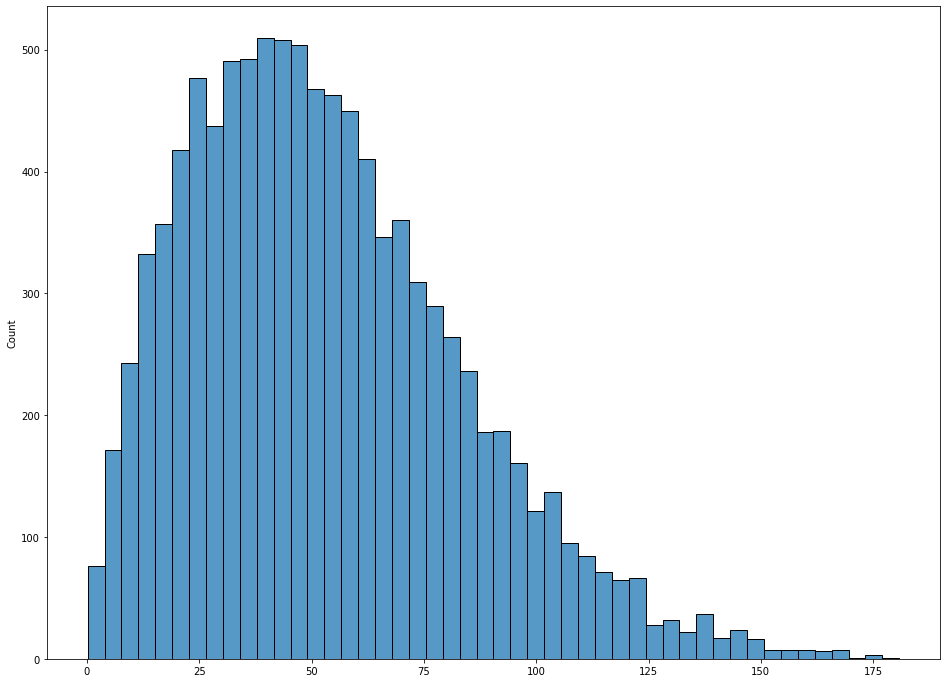

In [22]:
forma = 1.8
s = np.random.weibull(forma, 10000) * 60

sns.histplot(s)

## Gasto por departamentos

El gasto de los clientes se divide de la siguiente forma:

* Frutería: 20%
* Carnicería: 25%
* Resto: 55%

Si no quiere ir a alguna sección entonces no se asigna gasto a ella.

## La creación de un cliente es la siguiente:

In [23]:
import numpy as np

Parametros_Cliente = {
    'Prob_fruteria' : .25,
    'Prob_carniceria' : .15,
    'Gasto_fruteria' : .2,
    'Gasto_carniceria' : .25
}

class Cliente():
    def __init__(self, id_cliente, hora_llegada):
        self.Visita_Carniceria = np.random.random() <= Parametros_Cliente['Prob_carniceria']
        self.Visita_Fruteria = np.random.random() <= Parametros_Cliente['Prob_fruteria']
        self.Visita_Resto = 0
        
        self.Carniceria_Visitada = False
        self.Fruteria_Visitada = False
        self.Resto_Visitado = False
        
        self.Gasto_total = np.random.weibull(1.8, 1)[0] * 60
        
        if self.Visita_Carniceria:
            self.Gasto_Carniceria = self.Gasto_total * Parametros_Cliente['Gasto_carniceria']
        else:
            self.Gasto_Carniceria = 0
            
        if self.Visita_Fruteria:
            self.Gasto_Fruteria = self.Gasto_total * Parametros_Cliente['Gasto_fruteria']
        else:
            self.Gasto_Fruteria = 0
        
        self.Gasto_Resto = self.Gasto_total - self.Gasto_Fruteria - self.Gasto_Carniceria
        
        self.Hora_Llegada = hora_llegada
        self.Id_Cliente = id_cliente
        self.tiempo_espera_colas_total = 0
        self.Hora_Salida = 0
        self.Gasto_realizado = 0
        
        self.Hora_llegada_carniceria = 0
        self.Hora_llegada_fruteria = 0
        self.Hora_llegada_cajas = 0
        
        self.Paciencia_Carniceria = np.random.randint(3,8)
        self.Paciencia_Fruteria = np.random.randint(3,8)
        self.Paciencia_Cajas = np.random.randint(6,12)
        
        
    def __repr__(self):
        return f'''
\t\tId Cliente {self.Id_Cliente}
\t\t\tHora llegada {self.Hora_Llegada}
\t\t\tHora salida {self.Hora_Salida}
\t\t\tTiempo total en cola {self.tiempo_espera_colas_total}
\t\t\tGasto a realizar {self.Gasto_total:.2f} (C: {self.Gasto_Carniceria:.2f}, F: {self.Gasto_Fruteria:.2f}, R: {self.Gasto_Resto:.2f})
\t\t\tVisitará Carnicería {'Sí' if self.Visita_Carniceria else 'No' } si hay menos de {self.Paciencia_Carniceria}
\t\t\tVisitará Carnicería {'Sí' if self.Visita_Fruteria else 'No' } si hay menos de {self.Paciencia_Fruteria}
        '''
    
cliente_ejemplo = Cliente(0,0)

cliente_ejemplo


		Id Cliente 0
			Hora llegada 0
			Hora salida 0
			Tiempo total en cola 0
			Gasto a realizar 107.76 (C: 0.00, F: 0.00, R: 107.76)
			Visitará Carnicería No si hay menos de 7
			Visitará Carnicería No si hay menos de 4
        

## Mapa Conceptual

Tal como hemos dicho anteriormente, el proceso de simulación tendrá dos etapas principales:

1. Inicializacion
2. Bucle Principal 
3. Evaluación

### Inicialización
El supermercado se inicializa con cuatro recursos:
* Cola Carniceria: Capacidad 1
* Cola Fruteria: Capacidad 1
* Cola Cajas: Capacidad 3
* Cola Resto: Capacidad ilimitada

### Bucle principal
Cada minuto:

1. Se generan nuevos clientes:
    1. Estos clientes decidirán por qué departamento empiezan en funcion de las colas actuales y su paciencia
1. Algunos clientes terminarán la visita en un departamento:
    1. Si aún no han visitado todos sus departamentos escogen qué departamento visitan según su paciencia
    1. Si ya han visitado todos sus departamentos se van a la cola
    1. Si la cola es demasiado larga se van sin comprar
    
    
### Evaluación
1. Nos interesa:
    1. Tiempo total en espera por departamento
    1. Tiempo total en el supermercado
    1. Ingresos totales
    1. Ingresos perdidos
    



## Código de la simulación

In [31]:
import simpy
import numpy as np
import pandas as pd
from numpy import random

import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16,5)

Parametros = {
    'carniceria_media': 8,
    'carniceria_desv': 6,
    'fruteria_media': 4,
    'fruteria_desv': 1,
    'resto_media': 15,
    'resto_desv': 11,
    'pasos_simulacion': 600,
    'numero_cajas': 2,
    'numero_fruteros': 1,
    'numero_carniceros': 2,
    'semilla': 31
}


Estado = {
    'importe_total_cobrado': 0,
    'importe_perdido': 0,
    'importe_perdido_carniceria': 0,
    'importe_perdido_fruteria': 0,
    'importe_perdido_resto': 0,
    'tiempo_total_espera': 0,
    'tiempo_espera_carniceria': 0,
    'tiempo_espera_fruteria': 0,
    'tiempo_espera_cajas': 0,
    'cola_maxima_carniceria': 0,
    'cola_maxima_fruteria': 0,
    'cola_maxima_cajas':0,
    'cola_actual_carniceria':0,
    'cola_actual_fruteria':0,
    'cola_actual_cajas': 0,
    'clientes_actuales': 0,
    'clientes_atendidos': 0,
    'clientes_totales': 0,
    'clientes_cancelaron_carniceria': 0,
    'clientes_cancelaron_fruteria': 0,
    'clientes_cancelaron_caja': 0,
    'tiempo': 0
}


Historico = []

colas = {
    'Carniceria': None,
    'Fruteria': None,
    'Resto': None,
    'Cajas': None
}




def nuevo_cliente(env):
    while True:
        tiempo = env.now
        prob_base = abs(np.sin(env.now)) * 2
        nuevos_clientes = np.random.binomial(np.ceil(prob_base), np.min([prob_base,1]))

        for i in range(nuevos_clientes):
            x = Cliente(Estado['clientes_totales'], tiempo)
            Estado['clientes_totales'] += 1
            Estado['clientes_actuales'] += 1
            env.process(decision_cliente(env, x))

        yield env.timeout(1)

        
def decision_cliente(env, cliente):
    # Intentamos ir a la carniceria
    if cliente.Visita_Carniceria and not cliente.Carniceria_Visitada:
        c = colas['Carniceria']

        if len(c.queue) > cliente.Paciencia_Carniceria:
            if debug:
                print(f'Soy {cliente.Id_Cliente}, quería ir a la carnicería pero hay demasiada gente ({len(c.queue), {cliente.Paciencia_Carniceria}})')
            
        else:
            cliente.Hora_llegada_carniceria = env.now
            r = c.request()
            yield r

            Estado['tiempo_total_espera'] += env.now - cliente.Hora_llegada_carniceria
            Estado['tiempo_espera_carniceria'] += env.now - cliente.Hora_llegada_carniceria
            
            yield env.timeout(np.max([1,np.random.normal(Parametros['carniceria_media'], Parametros['carniceria_desv'])]))
            
            c.release(r)
            
            cliente.Carniceria_Visitada = True
            
            env.process(decision_cliente(env, cliente))
            return


    if cliente.Visita_Fruteria and not cliente.Fruteria_Visitada:
        c = colas['Fruteria']

        if len(c.queue) > cliente.Paciencia_Fruteria:
            if debug:
                print(f'Soy {cliente.Id_Cliente}, Quería ir a la frutería pero hay demasiada gente ({len(c.queue)}, {cliente.Paciencia_Fruteria})')
        else:
            cliente.Hora_llegada_fruteria = env.now
            r = c.request()
            yield r

            Estado['tiempo_total_espera'] += env.now - cliente.Hora_llegada_fruteria
            Estado['tiempo_espera_fruteria'] += env.now - cliente.Hora_llegada_fruteria
            
            yield env.timeout(np.max([1,np.random.normal(Parametros['fruteria_media'], Parametros['fruteria_desv'])]))
            
            c.release(r)
            
            cliente.Fruteria_Visitada = True
            env.process(decision_cliente(env, cliente))
            return

    if not cliente.Resto_Visitado:
        c = colas['Resto']

        r = c.request()
        yield r
        yield env.timeout(np.max([np.random.normal(Parametros['resto_media'], Parametros['resto_desv']), 1]))
        
        c.release(r)
        
        cliente.Resto_Visitado = True
        env.process(decision_cliente(env, cliente))
        return


    if cliente.Visita_Carniceria and not cliente.Carniceria_Visitada:
        Estado['importe_perdido_carniceria'] += cliente.Gasto_Carniceria
        cliente.Gasto_total - cliente.Gasto_Carniceria
        cliente.Gasto_Carniceria = 0
        Estado['clientes_cancelaron_carniceria'] += 1



    if cliente.Visita_Fruteria and not cliente.Fruteria_Visitada:
        Estado['importe_perdido_fruteria'] += cliente.Gasto_Fruteria
        cliente.Gasto_total -= cliente.Gasto_Fruteria
        cliente.Gasto_Fruteria = 0
        Estado['clientes_cancelaron_fruteria'] += 1

    c = colas['Cajas']

    if len(c.queue) > cliente.Paciencia_Cajas:
        if debug:
            print(f'Soy {cliente.Id_Cliente}, Quería pagar pero hay demasiada gente, habéis perdido {cliente.Gasto_total:.2f}')
        Estado['importe_perdido'] += cliente.Gasto_total
        Estado['importe_perdido_resto'] += cliente.Gasto_total
        Estado['clientes_cancelaron_caja'] += 1
    else:
        if debug:
            print(f'Soy {cliente.Id_Cliente}, voy a pagar {cliente.Gasto_total}')
        
        cliente.Hora_llegada_cajas = env.now
        
        r = c.request()
        yield r

        Estado['tiempo_total_espera'] += env.now - cliente.Hora_llegada_cajas
        Estado['tiempo_espera_cajas'] += env.now - cliente.Hora_llegada_cajas

        yield env.timeout(int(cliente.Gasto_total / 40) + 1)
        
        c.release(r)
        
        Estado['importe_total_cobrado'] += cliente.Gasto_total
        
        
    
    Estado['clientes_atendidos'] += 1
    Estado['clientes_actuales'] -= 1
        
def almacenar_historico(env):
    while True:
        Estado['tiempo'] = env.now
        Estado['cola_actual_carniceria'] = len(colas['Carniceria'].queue)
        Estado['cola_actual_fruteria'] = len(colas['Fruteria'].queue)
        Estado['cola_actual_cajas'] = len(colas['Cajas'].queue)
        
        if Estado['cola_actual_carniceria'] > Estado['cola_maxima_carniceria']:
            Estado['cola_maxima_carniceria'] = Estado['cola_actual_carniceria']
        
        if Estado['cola_actual_fruteria'] > Estado['cola_maxima_fruteria']:
            Estado['cola_maxima_fruteria'] = Estado['cola_actual_fruteria']
        
        if Estado['cola_actual_cajas'] > Estado['cola_maxima_cajas']:
            Estado['cola_maxima_cajas'] = Estado['cola_actual_cajas']
        
        
        Historico.append(Estado.copy())
        
        yield env.timeout(1)
        
def simular():
    random.seed(Parametros['semilla'])
    Historico.clear()
    
    env = simpy.Environment()
    
    cola_cajas = simpy.Resource(env, capacity=Parametros['numero_cajas'])
    cola_fruteria = simpy.Resource(env, capacity=Parametros['numero_fruteros'])
    cola_carniceria = simpy.Resource(env, capacity=Parametros['numero_carniceros'])
    cola_resto = simpy.Resource(env, capacity=10000)
    
    colas['Cajas'] = cola_cajas
    colas['Fruteria'] = cola_fruteria
    colas['Carniceria'] = cola_carniceria
    colas['Resto'] = cola_resto
    
    
    env.process(nuevo_cliente(env))
    env.process(almacenar_historico(env))
    env.run(until=Parametros['pasos_simulacion'])

debug = True
    
simular()

Soy 6, voy a pagar 30.983870985763936
Soy 0, voy a pagar 26.73616352768528
Soy 11, voy a pagar 61.63614828430768
Soy 4, voy a pagar 38.41962024462545
Soy 16, voy a pagar 7.394347938579803
Soy 8, voy a pagar 53.837019030540766
Soy 2, voy a pagar 13.098803708245553
Soy 19, voy a pagar 82.76132099706541
Soy 24, voy a pagar 71.65336739489199
Soy 3, voy a pagar 81.84374179920113
Soy 10, voy a pagar 37.844867313517454
Soy 29, voy a pagar 119.56175595444421
Soy 17, voy a pagar 34.79695545218921
Soy 5, voy a pagar 16.18554959304676
Soy 34, Quería ir a la frutería pero hay demasiada gente (4, 3)
Soy 20, voy a pagar 21.150778982555867
Soy 28, voy a pagar 38.15709764880203
Soy 18, voy a pagar 9.377739265824179
Soy 26, voy a pagar 52.89232241044527
Soy 14, voy a pagar 47.23003807981737
Soy 45, Quería ir a la frutería pero hay demasiada gente (4, 3)
Soy 40, voy a pagar 37.274539004517074
Soy 46, voy a pagar 36.90774350188581
Soy 13, voy a pagar 66.07265540171609
Soy 54, voy a pagar 47.8192386719524

Soy 341, voy a pagar 9.346366990625361
Soy 331, Quería pagar pero hay demasiada gente, habéis perdido 67.51
Soy 342, Quería pagar pero hay demasiada gente, habéis perdido 46.31
Soy 321, voy a pagar 22.3794408000023
Soy 291, Quería pagar pero hay demasiada gente, habéis perdido 16.13
Soy 316, voy a pagar 127.36338756873945
Soy 304, voy a pagar 3.7267425833161703
Soy 269, voy a pagar 34.65687054788899
Soy 339, voy a pagar 22.329975124193364
Soy 314, voy a pagar 23.41172746965278
Soy 354, Quería ir a la frutería pero hay demasiada gente (5, 4)
Soy 307, voy a pagar 70.42695729639857
Soy 290, voy a pagar 100.71780127259096
Soy 328, quería ir a la carnicería pero hay demasiada gente ((4, {3}))
Soy 328, voy a pagar 22.455729750669356
Soy 356, Quería ir a la frutería pero hay demasiada gente (6, 3)
Soy 279, voy a pagar 55.65078916553129
Soy 359, Quería ir a la frutería pero hay demasiada gente (5, 3)
Soy 338, voy a pagar 38.19580285155668
Soy 305, voy a pagar 96.23994071999384
Soy 351, voy a p

Soy 623, Quería pagar pero hay demasiada gente, habéis perdido 85.99
Soy 582, voy a pagar 112.13795260746119
Soy 611, voy a pagar 21.72349395966049
Soy 624, voy a pagar 49.156976280239235
Soy 585, voy a pagar 14.155971663490954
Soy 590, voy a pagar 46.54580928428987
Soy 579, voy a pagar 72.86049553252181
Soy 592, Quería pagar pero hay demasiada gente, habéis perdido 73.22
Soy 620, voy a pagar 102.55142140606009
Soy 627, voy a pagar 79.50973154939476
Soy 599, voy a pagar 58.96308150427848
Soy 616, voy a pagar 49.61344473807387
Soy 591, voy a pagar 78.94103656655517
Soy 602, voy a pagar 97.81018600170788
Soy 641, voy a pagar 39.15169477661247
Soy 644, voy a pagar 36.40868020304445
Soy 646, voy a pagar 56.82583338355658
Soy 614, voy a pagar 24.060028862714237
Soy 628, Quería pagar pero hay demasiada gente, habéis perdido 67.91
Soy 618, Quería pagar pero hay demasiada gente, habéis perdido 62.11
Soy 622, Quería pagar pero hay demasiada gente, habéis perdido 16.01
Soy 609, voy a pagar 29.23

In [32]:
def mostrar_evolucion(campo):
    datos = []
    
    sns.lineplot(x=[x['tiempo'] for x in Historico], y=[x[campo] for x in Historico])

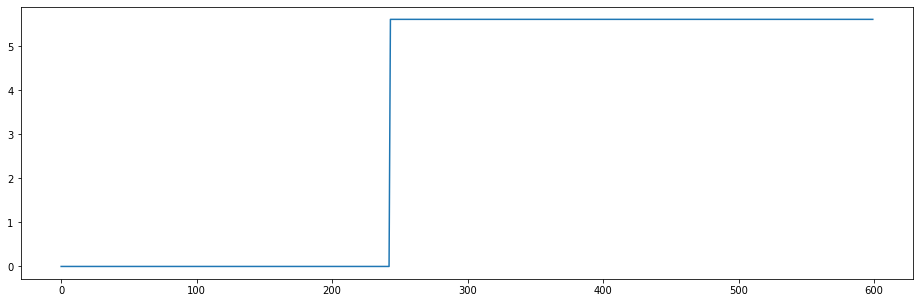

In [33]:
mostrar_evolucion('importe_perdido_carniceria')

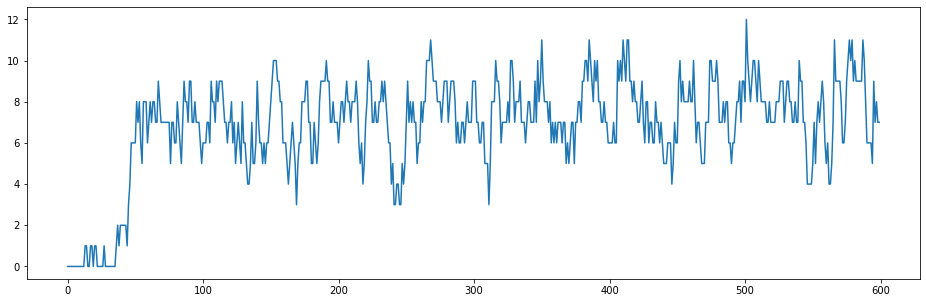

In [27]:
mostrar_evolucion('cola_actual_cajas')

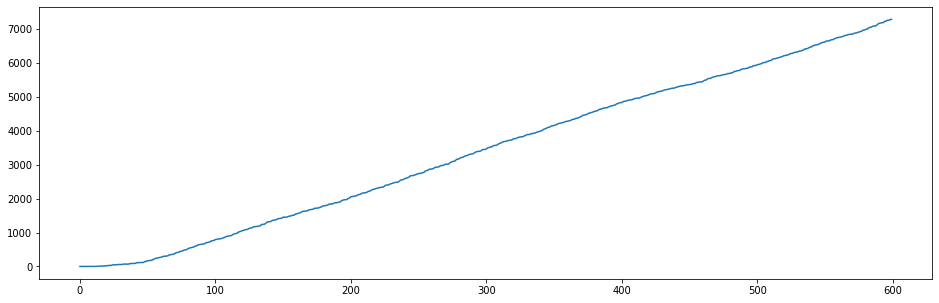

In [28]:
mostrar_evolucion('tiempo_total_espera')